### Pair Programming Intro Machine Learning
Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.



In [64]:
df=pd.read_csv("../datos/diamonds.csv", index_col=0)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Explicación variables

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [65]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [66]:
print(f'El numero de filas antes de borrar los casos duplicados es: {df.shape[0]}, y el numero de columnas es: {df.shape[1]}')

El numero de filas antes de borrar los casos duplicados es: 53940, y el numero de columnas es: 10


In [67]:
#exploramos el df:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [68]:
#calculamos el % de nulos:
df.isnull().sum()*100/df.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [69]:
#hacemos una copia del df
df = df.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Los nombres de las columnas x, y, z son poco claros, por lo que tras consultar la documentación del DF y comprender su significado, vamos a reemplazar los nombres:

x: length in mm, y: width in mm,z: depth in mm 

In [70]:
#renombramos las columnas
df.rename(columns={'x': 'lenght_mm', 'y': 'width_mm', 'z': 'depth_mm'}, inplace=True)

In [71]:
#comprobamos que se han renombrado:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'lenght_mm', 'width_mm', 'depth_mm'],
      dtype='object')

Tenemos duplicados por lo que procederemos a su limpieza:

In [72]:
df_duplis = df[df.duplicated()]
df_duplis.head()

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28


In [73]:
#procedemos a borrarlos:
df.drop_duplicates(inplace=True)

In [74]:
print(f'El numero de filas después de borrar los casos duplicados es: {df.shape[0]}, y el numero de columnas es: {df.shape[1]}')
print(f'Se han borrado un total de {(df.shape[0] - df.shape[0])} casos.')

El numero de filas después de borrar los casos duplicados es: 53794, y el numero de columnas es: 10
Se han borrado un total de 0 casos.


Tras el analisis exploratorio de los datos, concluimos que no es necesaria una depuracion del dataset

In [75]:
#variables numéricas.
round(df.describe(),2)

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
count,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00,53794.00
mean,0.80,61.75,57.46,3933.07,5.73,5.73,3.54
std,0.47,1.43,2.23,3988.11,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,951.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5326.75,6.54,6.54,4.03
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [76]:
#variables categóricas.
df.describe(include='object')

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


[comentar]

## Exploración de outliers:

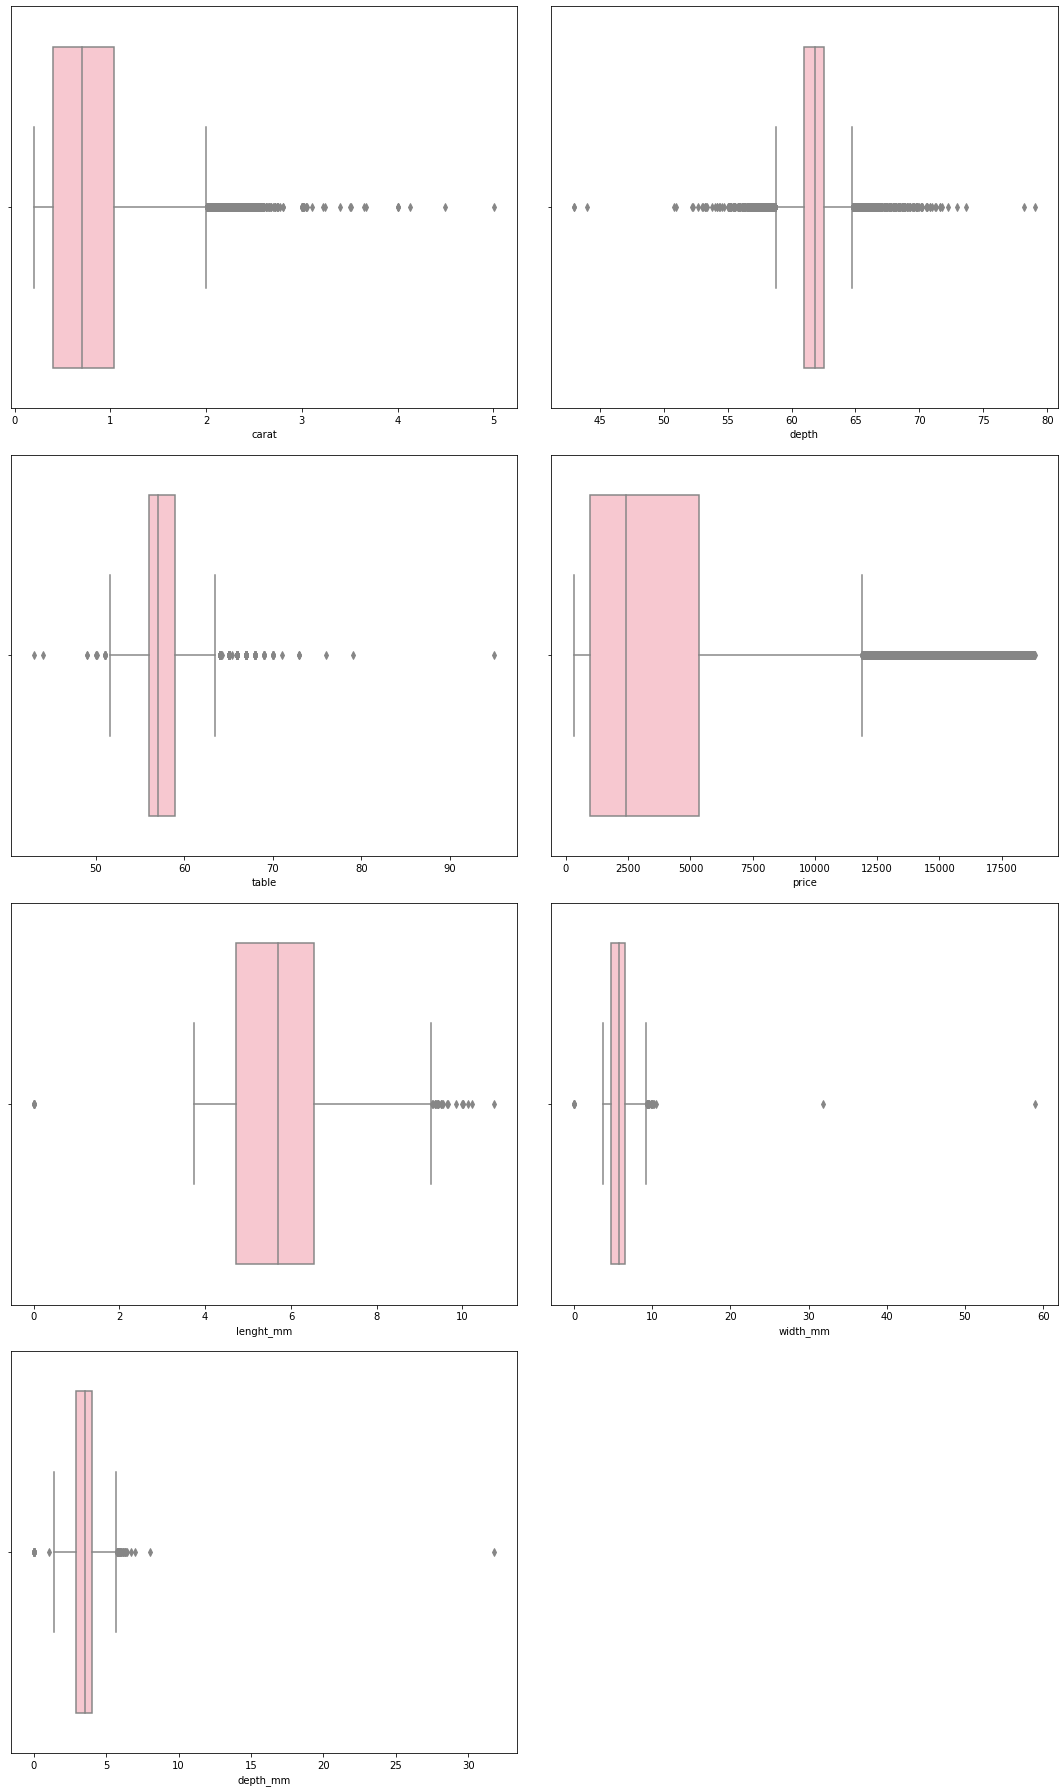

In [80]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink")

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [86]:
dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers

def detectar_outliers(lista_columnas, dataframe): 
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)

        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 2 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
            print(col.upper())
            #display(outliers_data)
            print("-----------")

    
    return dicc_indices

In [82]:
dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers

def detectar_outliers_columna(col, dataframe): 
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    
    #calculamos los cuartiles Q1 y Q3
    Q1 = np.nanpercentile(dataframe[col], 25)
    Q3 = np.nanpercentile(dataframe[col], 75)

    # calculamos el rango intercuartil
    IQR = Q3 - Q1
    
    # calculamos los límites
    outlier_step = 2 * IQR
    
    # filtramos nuestro dataframe para indentificar los outliers
    outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
    
    
    if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
    
        dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
        print(col.upper())
        display(outliers_data.shape)
        print("-----------")


    return dicc_indices

In [87]:
#todos los outliers del df:
index_all = detectar_outliers(numericas.columns, numericas)

CARAT
-----------
DEPTH
-----------
TABLE
-----------
PRICE
-----------
LENGHT_MM
-----------
WIDTH_MM
-----------
DEPTH_MM
-----------


In [88]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'lenght_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [89]:
#calculamos los outliers según nuestras preguntas de investigación:
index_width = detectar_outliers_columna('width_mm', df)
index_lenght = detectar_outliers_columna('lenght_mm', df)
index_carat = detectar_outliers_columna('carat', df)

WIDTH_MM


(9, 10)

-----------
LENGHT_MM


(9, 10)

-----------
CARAT


(245, 10)

-----------


In [90]:
#reemplazamos todos los outliers por la mediana a partir del diccionario creado con todas las columnas:
for k, v in index_all.items():
    median = df[k].median()
    
    for i in v:
        df.loc[i,k] = median

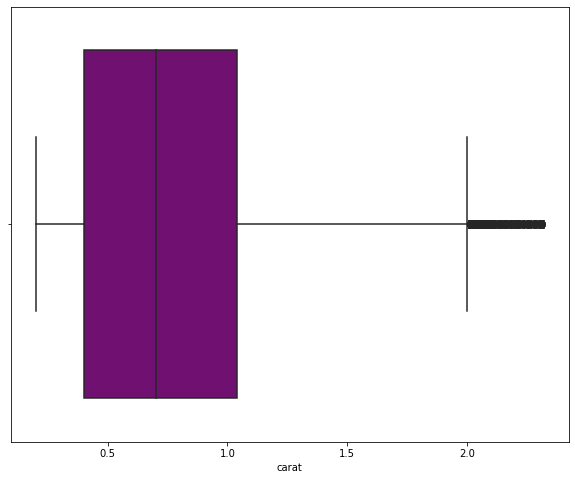

In [91]:
sns.boxplot(x=df['carat'], data=df, color='purple')
plt.show();

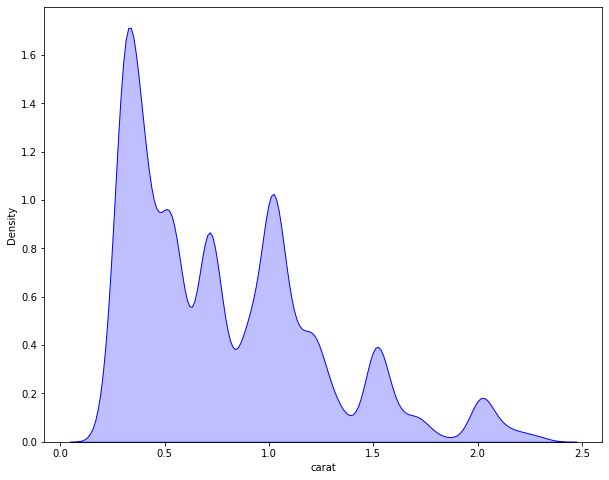

In [92]:
# distribución asimetría variable respuesta

sns.distplot(
    df["carat"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

<AxesSubplot:xlabel='carat', ylabel='Count'>

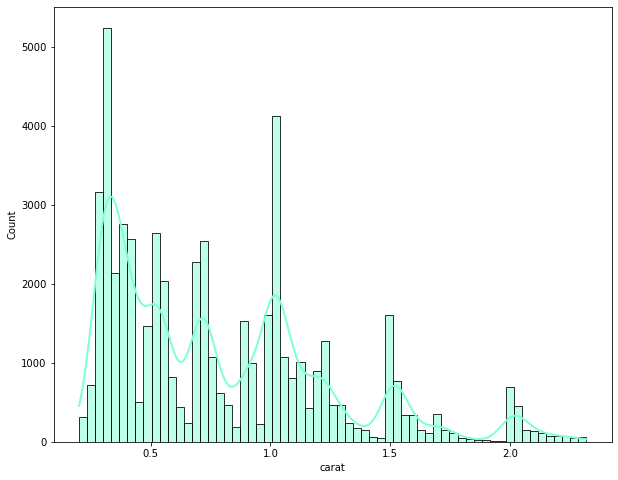

In [93]:
#variable resultado
sns.histplot(
        data = df, x = 'carat',
        kde = True, color = "aquamarine", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5
        ) # para especificar la transparencia del color)

## Exploración de correlaciones:

#### Variable predictora:

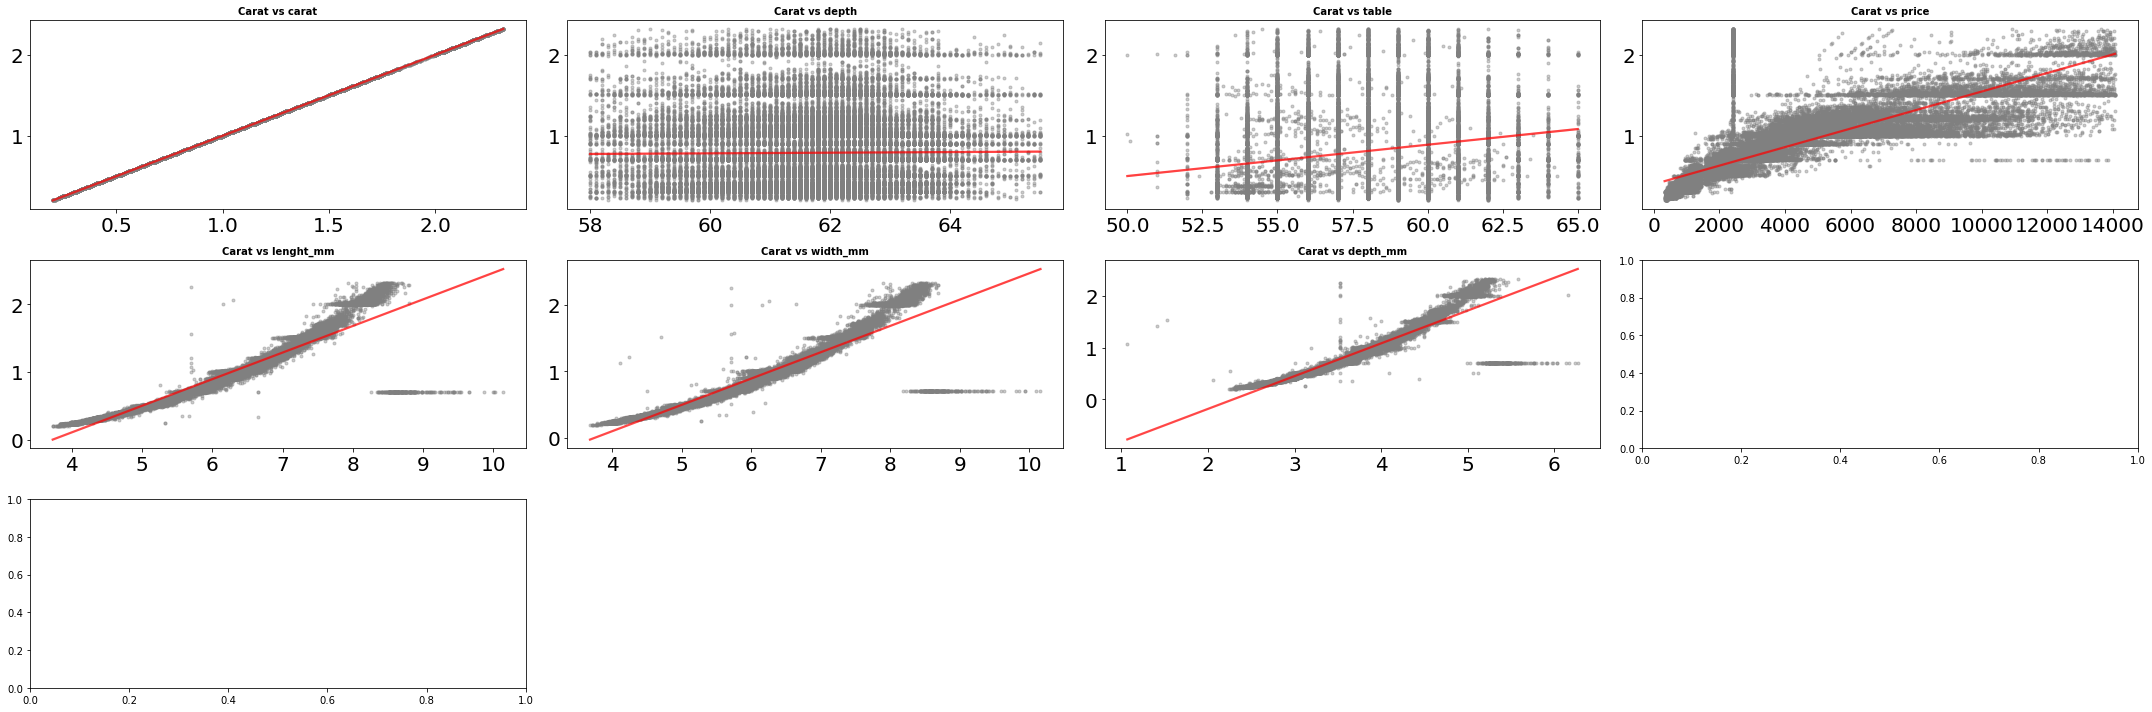

In [94]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

axes = axes.flat

df2_columns_num = df.select_dtypes(include=np.number)

for i, colum in enumerate(df2_columns_num):
    sns.regplot(
        x = df[colum],
        y = df['carat'],
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Carat vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

**Interpretación**:

A simple vista, vemos las siguientes relaciones:  

- Por lo general, la tendencia es que, a mayor carat, mayor la anchura, longitud y profundidad del diamante.

- No vemos una relación del todo clara entre los carats y el precio.

In [95]:
round(df.corr(),2)

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
carat,1.00,0.01,0.18,0.78,0.96,0.96,0.96
depth,0.01,1.00,-0.27,0.00,-0.03,-0.03,0.07
table,0.18,-0.27,1.00,0.12,0.20,0.19,0.16
price,0.78,0.00,0.12,1.00,0.79,0.79,0.78
lenght_mm,0.96,-0.03,0.20,0.79,1.00,1.00,0.99
width_mm,0.96,-0.03,0.19,0.79,1.00,1.00,0.99
depth_mm,0.96,0.07,0.16,0.78,0.99,0.99,1.00


Sin embargo, explorando los valores numéricos de las correlaciones, si existe una relación muy significativa (0.78) entre precio y carats. Ahora sí, podemos confirmar que los diamantes son mayores carats son los más caros.

También serán más caros aquellos que sean más largos (0.79), más profundos (0.78) y más anchos (0.79).


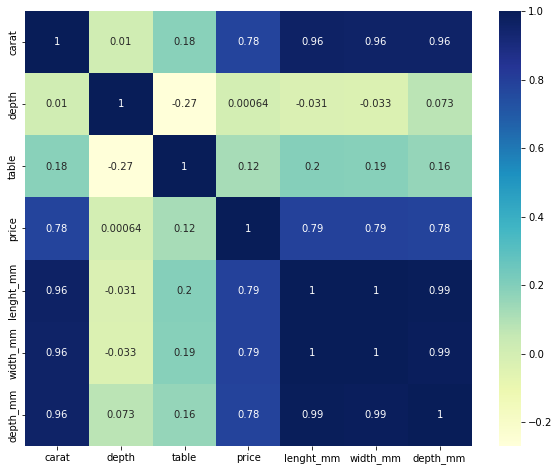

In [96]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

- Podemos intuir que la forma aproximada de los diamantes es cuadrada dada la tan estrecha correlación que existe entre el largo, el ancho y lo profundo: Es decir, que cuanto más ancho, más largo, y cuando más largo y ancho, más profundo. Por ello, la forma sería cuadrada o circular. 

- A mayor tamaño (ancho, largo y profundo), más caros.

#### Guardamos el csv:

In [97]:
df.to_csv('../datos/diamonds_1.csv')